### Visualization
---

In [1]:
import sys

sys.path.append("..")
from preprocess.utils import TextConverter
from preprocess.data import TextDataForTC

from __future__ import print_function
import time, yaml, torch
import numpy as np
import pandas as pd
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
%matplotlib inline
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import seaborn as sns

[nltk_data] Downloading package stopwords to
[nltk_data]     /usr/local/share/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


### Feature Dim = 300
---

### MR-lstm
---

In [2]:
dataset = 'mr'
model = 'lstm'
with open('./doc_embeddings/{}_{}_doc_vectors.txt'.format(dataset, model), 'r') as f:
    doc_embed = f.readlines()

In [3]:
X = []
for s in doc_embed:
    X.append(s.split())

In [4]:
feat_cols = [ 'embed_dim_'+str(i) for i in range(len(X[0])-2) ]
meta_cols = ["doc_id", "label"]
df = pd.DataFrame(X,columns=meta_cols+feat_cols)
df[feat_cols] = df[feat_cols].astype(float)
df['label'] = df['label'].apply(lambda x: int(x.split(":")[1]))
print('Size of the dataframe: {}'.format(df.shape))

Size of the dataframe: (3554, 402)


In [5]:
df_test = df[df.doc_id.str.contains('test')]

In [6]:
df_test.head()

,doc_id,label,embed_dim_0,embed_dim_1,embed_dim_2,embed_dim_3,embed_dim_4,embed_dim_5,embed_dim_6,embed_dim_7,...,embed_dim_390,embed_dim_391,embed_dim_392,embed_dim_393,embed_dim_394,embed_dim_395,embed_dim_396,embed_dim_397,embed_dim_398,embed_dim_399
0,doc_test_id_0,0,-0.843697,-0.392924,-0.757980,-0.807238,-1.386648,-0.739823,-1.266766,-0.604381,...,0.550452,-0.345479,-0.126110,0.169101,-0.254248,-0.711412,1.149203,0.377391,-0.304497,0.695927
1,doc_test_id_1,0,-0.822532,0.960626,-0.222818,-0.793724,-0.751877,-0.363181,-0.380586,0.484830,...,-0.942229,-0.379486,-0.604113,-0.018471,-0.113805,-0.381383,2.576914,1.234512,-0.304497,-0.140254
2,doc_test_id_2,0,-0.688270,0.581846,0.364604,-0.275106,-0.213746,-0.536950,-0.407834,1.206406,...,-0.730875,0.538117,-0.505195,0.641264,0.863552,-0.501694,1.513919,-0.035820,-0.304497,0.284150
3,doc_test_id_3,1,-0.195334,0.565085,1.599957,0.412509,-0.196821,-0.539665,-0.478443,1.966214,...,-0.155124,0.872065,-0.410618,-0.533805,0.214685,-0.498916,1.755000,0.215530,-0.304497,0.644578
4,doc_test_id_4,0,-0.158006,0.295643,0.097870,0.290598,1.946668,-0.317576,0.650944,0.286563,...,-0.273979,0.778604,-0.628464,-0.668313,-1.268867,-1.076757,0.384474,-0.002085,-0.304497,0.030723


In [7]:
# Now lets only look at df_test
df = df_test.copy()
df.reset_index(drop=True, inplace=True)

#### PCA

In [8]:
df.head()

,doc_id,label,embed_dim_0,embed_dim_1,embed_dim_2,embed_dim_3,embed_dim_4,embed_dim_5,embed_dim_6,embed_dim_7,...,embed_dim_390,embed_dim_391,embed_dim_392,embed_dim_393,embed_dim_394,embed_dim_395,embed_dim_396,embed_dim_397,embed_dim_398,embed_dim_399
0,doc_test_id_0,0,-0.843697,-0.392924,-0.757980,-0.807238,-1.386648,-0.739823,-1.266766,-0.604381,...,0.550452,-0.345479,-0.126110,0.169101,-0.254248,-0.711412,1.149203,0.377391,-0.304497,0.695927
1,doc_test_id_1,0,-0.822532,0.960626,-0.222818,-0.793724,-0.751877,-0.363181,-0.380586,0.484830,...,-0.942229,-0.379486,-0.604113,-0.018471,-0.113805,-0.381383,2.576914,1.234512,-0.304497,-0.140254
2,doc_test_id_2,0,-0.688270,0.581846,0.364604,-0.275106,-0.213746,-0.536950,-0.407834,1.206406,...,-0.730875,0.538117,-0.505195,0.641264,0.863552,-0.501694,1.513919,-0.035820,-0.304497,0.284150
3,doc_test_id_3,1,-0.195334,0.565085,1.599957,0.412509,-0.196821,-0.539665,-0.478443,1.966214,...,-0.155124,0.872065,-0.410618,-0.533805,0.214685,-0.498916,1.755000,0.215530,-0.304497,0.644578
4,doc_test_id_4,0,-0.158006,0.295643,0.097870,0.290598,1.946668,-0.317576,0.650944,0.286563,...,-0.273979,0.778604,-0.628464,-0.668313,-1.268867,-1.076757,0.384474,-0.002085,-0.304497,0.030723


In [9]:
# For reproducability of the results
np.random.seed(42)
rndperm = np.random.permutation(df.shape[0])

In [10]:
N = min(10000, df.shape[0])
df_subset = df.loc[rndperm[:N],:].copy()
data_subset = df_subset[feat_cols].values
pca = PCA(n_components=3)
pca_result = pca.fit_transform(data_subset)
df_subset['pca-one'] = pca_result[:,0]
df_subset['pca-two'] = pca_result[:,1] 
df_subset['pca-three'] = pca_result[:,2]
print('Explained variation per principal component: {}'.format(pca.explained_variance_ratio_))

Explained variation per principal component: [0.1438794  0.09841111 0.0903193 ]


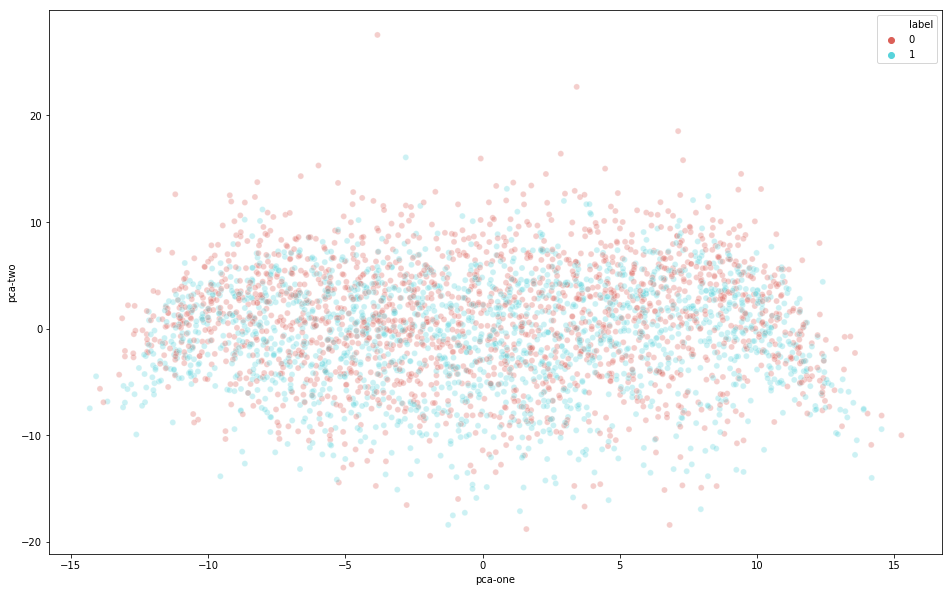

In [11]:
# 2d
plt.figure(figsize=(16,10))
sns.scatterplot(
    x="pca-one", y="pca-two",
    hue="label",
    palette=sns.color_palette("hls", df_subset.label.nunique()),
    data=df_subset.loc[rndperm,:],
    legend="full",
    alpha=0.3
)

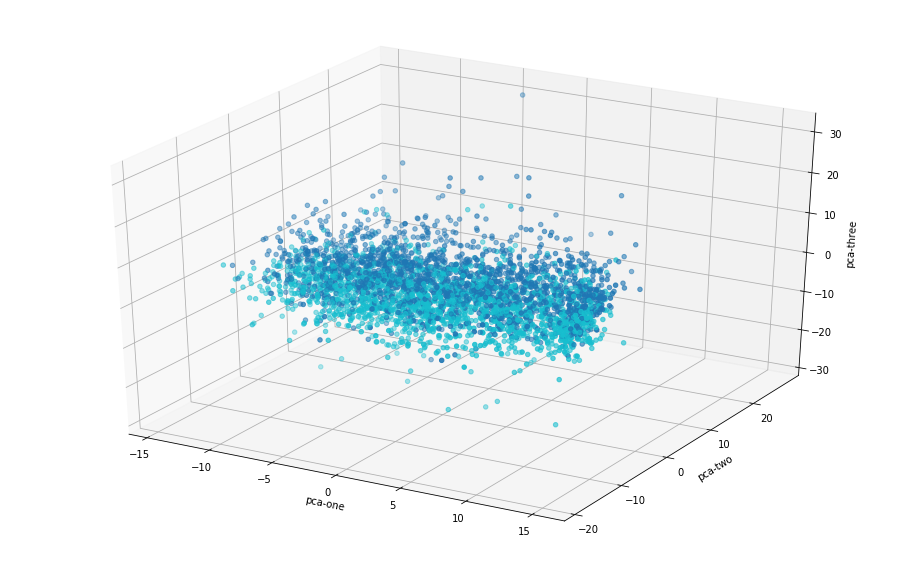

In [12]:
# 3d
ax = plt.figure(figsize=(16,10)).gca(projection='3d')
ax.scatter(
    xs=df_subset.loc[rndperm,:]["pca-one"], 
    ys=df_subset.loc[rndperm,:]["pca-two"], 
    zs=df_subset.loc[rndperm,:]["pca-three"], 
    c=df_subset.loc[rndperm,:]["label"], 
    cmap='tab10'
)
ax.set_xlabel('pca-one')
ax.set_ylabel('pca-two')
ax.set_zlabel('pca-three')
plt.show()

#### TSNE

In [13]:
np.random.seed(42)
time_start = time.time()
tsne = TSNE(n_components=2, verbose=1, perplexity=30, n_iter=300)
tsne_results = tsne.fit_transform(data_subset)

[t-SNE] Computing 91 nearest neighbors...
[t-SNE] Indexed 3554 samples in 0.047s...
[t-SNE] Computed neighbors for 3554 samples in 8.833s...
[t-SNE] Computed conditional probabilities for sample 1000 / 3554
[t-SNE] Computed conditional probabilities for sample 2000 / 3554
[t-SNE] Computed conditional probabilities for sample 3000 / 3554
[t-SNE] Computed conditional probabilities for sample 3554 / 3554
[t-SNE] Mean sigma: 3.836783
[t-SNE] KL divergence after 250 iterations with early exaggeration: 81.678223
[t-SNE] KL divergence after 300 iterations: 2.701311


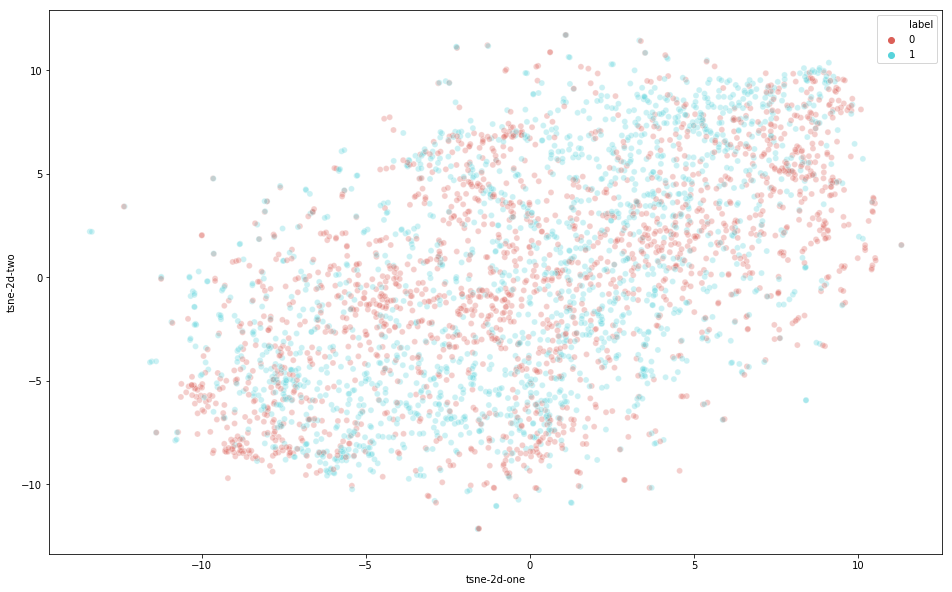

In [14]:
df_subset['tsne-2d-one'] = tsne_results[:,0]
df_subset['tsne-2d-two'] = tsne_results[:,1]
df_subset2 = df_subset#[df_subset['tsne-2d-two']]

plt.figure(figsize=(16,10))
sns.scatterplot(
    x="tsne-2d-one", y="tsne-2d-two",
    hue="label",
    palette=sns.color_palette("hls", df_subset2.label.nunique()),
    data=df_subset2,
    legend="full",
    alpha=0.3
)

#### Combined

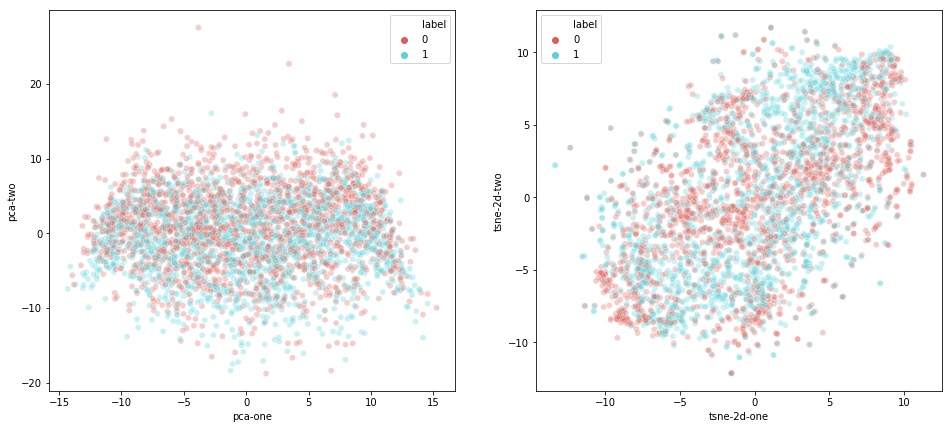

In [15]:
n_class = df_subset2.label.nunique()
plt.figure(figsize=(16,7))
ax1 = plt.subplot(1, 2, 1)
sns.scatterplot(
    x="pca-one", y="pca-two",
    hue="label",
    palette=sns.color_palette("hls", n_class),
    data=df_subset2,
    legend="full",
    alpha=0.3,
    ax=ax1
)
ax2 = plt.subplot(1, 2, 2)
sns.scatterplot(
    x="tsne-2d-one", y="tsne-2d-two",
    hue="label",
    palette=sns.color_palette("hls", n_class),
    data=df_subset2,
    legend="full",
    alpha=0.3,
    ax=ax2
)

#### Attention Weights

In [10]:
dataset = 'mr'
model = 'lstm'
attn_obj = torch.load('./doc_embeddings/{}_{}_attn_obj.pt'.format(dataset, model))
texts = attn_obj['texts']
labels = np.array(attn_obj['labels'])
seq_lens = attn_obj['seq_lens']
ids = np.array(attn_obj['doc_test_ids'])
preds = np.array(attn_obj['preds'])

In [11]:
def plot_attention_weights(i, texts, labels, seq_lens, attns, max_tokens=80):
    seq_len = seq_lens[i]
    raw_sent = texts[i]
    sent = ' '.join(raw_sent.split()[:seq_len])
    attn = np.array(attns[i][:seq_len])
    label = labels[i]
    df = pd.DataFrame({'text': sent.split(), 'attn': attn}).iloc[:max_tokens]
    fig = plt.figure(figsize=(16,1))
    sns.heatmap(df['attn'].values.reshape(1,-1), 
                xticklabels=df['text'].values,
                yticklabels=['attn'],
                cmap='coolwarm')
    plt.title("label: {}".format(label))

In [15]:
ids[preds == labels]

array(['doc_test_id_0', 'doc_test_id_3', 'doc_test_id_4', ...,
       'doc_test_id_3550', 'doc_test_id_3551', 'doc_test_id_3553'],
      dtype='<U16')

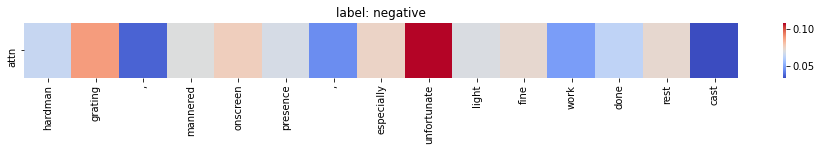

In [16]:
plot_attention_weights(0, texts, labels, seq_lens, attns, max_tokens=80)

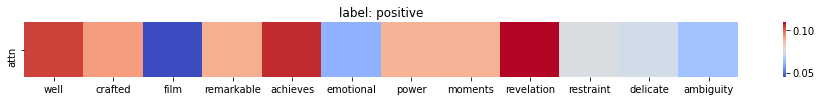

In [17]:
plot_attention_weights(3, texts, labels, seq_lens, attns, max_tokens=80)

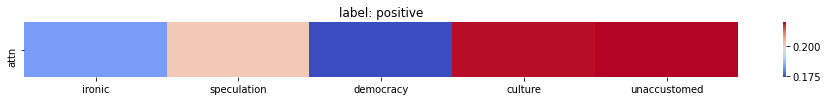

In [18]:
plot_attention_weights(3550, texts, labels, seq_lens, attns, max_tokens=80)

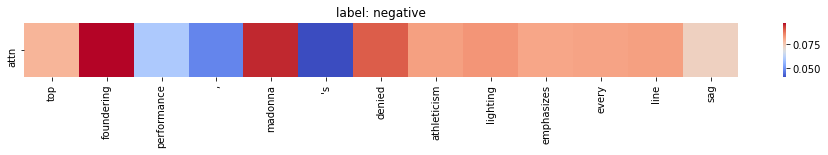

In [20]:
plot_attention_weights(3553, texts, labels, seq_lens, attns, max_tokens=80)

### MR-transformer
---

In [21]:
dataset = 'mr'
model = 'transformer'
with open('./doc_embeddings/{}_{}_doc_vectors.txt'.format(dataset, model), 'r') as f:
    doc_embed = f.readlines()

In [22]:
X = []
for s in doc_embed:
    X.append(s.split())

In [23]:
feat_cols = [ 'embed_dim_'+str(i) for i in range(len(X[0])-2) ]
meta_cols = ["doc_id", "label"]
df = pd.DataFrame(X,columns=meta_cols+feat_cols)
df[feat_cols] = df[feat_cols].astype(float)
df['label'] = df['label'].apply(lambda x: int(x.split(":")[1]))
print('Size of the dataframe: {}'.format(df.shape))

Size of the dataframe: (3554, 302)


In [24]:
df_test = df[df.doc_id.str.contains('test')]

In [25]:
df_test.head()

,doc_id,label,embed_dim_0,embed_dim_1,embed_dim_2,embed_dim_3,embed_dim_4,embed_dim_5,embed_dim_6,embed_dim_7,...,embed_dim_290,embed_dim_291,embed_dim_292,embed_dim_293,embed_dim_294,embed_dim_295,embed_dim_296,embed_dim_297,embed_dim_298,embed_dim_299
0,doc_test_id_0,0,0.116501,-0.038675,-0.028585,0.644426,0.375934,-0.200910,0.320707,0.311073,...,-0.497262,-0.070526,-0.512582,-0.048494,-0.082516,-0.203841,-0.052135,0.305861,-1.123145,-0.322648
1,doc_test_id_1,0,-0.027337,0.269256,0.529750,0.941862,-0.036604,0.276922,0.921284,-1.333523,...,-0.441378,0.588185,0.170724,0.040154,-0.685322,-0.883056,-0.463831,-1.166534,-1.282212,-0.416853
2,doc_test_id_2,0,-0.597434,-0.230307,0.165957,0.415047,0.210072,-0.012820,-0.019276,0.250383,...,0.149483,0.154259,-0.392972,0.486391,0.041942,-0.414606,0.177620,0.329117,-1.094946,-0.034662
3,doc_test_id_3,1,-0.201710,-0.187790,-0.316999,0.933118,0.570435,-0.245284,0.139694,-0.055033,...,0.029885,0.094784,0.097424,-0.329247,-0.201828,0.096480,0.175454,0.040891,-0.745523,-0.428194
4,doc_test_id_4,0,-0.576233,-0.241954,0.255280,-0.094357,-0.058225,-0.133642,0.432397,0.175944,...,-0.141681,0.741735,-0.220383,0.313717,0.111416,-0.614830,-0.028942,-0.045445,-0.855283,0.085609


In [26]:
# Now lets only look at df_test
df = df_test.copy()
df.reset_index(drop=True, inplace=True)

#### PCA

In [27]:
df.head()

,doc_id,label,embed_dim_0,embed_dim_1,embed_dim_2,embed_dim_3,embed_dim_4,embed_dim_5,embed_dim_6,embed_dim_7,...,embed_dim_290,embed_dim_291,embed_dim_292,embed_dim_293,embed_dim_294,embed_dim_295,embed_dim_296,embed_dim_297,embed_dim_298,embed_dim_299
0,doc_test_id_0,0,0.116501,-0.038675,-0.028585,0.644426,0.375934,-0.200910,0.320707,0.311073,...,-0.497262,-0.070526,-0.512582,-0.048494,-0.082516,-0.203841,-0.052135,0.305861,-1.123145,-0.322648
1,doc_test_id_1,0,-0.027337,0.269256,0.529750,0.941862,-0.036604,0.276922,0.921284,-1.333523,...,-0.441378,0.588185,0.170724,0.040154,-0.685322,-0.883056,-0.463831,-1.166534,-1.282212,-0.416853
2,doc_test_id_2,0,-0.597434,-0.230307,0.165957,0.415047,0.210072,-0.012820,-0.019276,0.250383,...,0.149483,0.154259,-0.392972,0.486391,0.041942,-0.414606,0.177620,0.329117,-1.094946,-0.034662
3,doc_test_id_3,1,-0.201710,-0.187790,-0.316999,0.933118,0.570435,-0.245284,0.139694,-0.055033,...,0.029885,0.094784,0.097424,-0.329247,-0.201828,0.096480,0.175454,0.040891,-0.745523,-0.428194
4,doc_test_id_4,0,-0.576233,-0.241954,0.255280,-0.094357,-0.058225,-0.133642,0.432397,0.175944,...,-0.141681,0.741735,-0.220383,0.313717,0.111416,-0.614830,-0.028942,-0.045445,-0.855283,0.085609


In [28]:
# For reproducability of the results
np.random.seed(42)
rndperm = np.random.permutation(df.shape[0])

In [29]:
N = min(10000, df.shape[0])
df_subset = df.loc[rndperm[:N],:].copy()
data_subset = df_subset[feat_cols].values
pca = PCA(n_components=3)
pca_result = pca.fit_transform(data_subset)
df_subset['pca-one'] = pca_result[:,0]
df_subset['pca-two'] = pca_result[:,1] 
df_subset['pca-three'] = pca_result[:,2]
print('Explained variation per principal component: {}'.format(pca.explained_variance_ratio_))

Explained variation per principal component: [0.03579974 0.03251004 0.01787431]


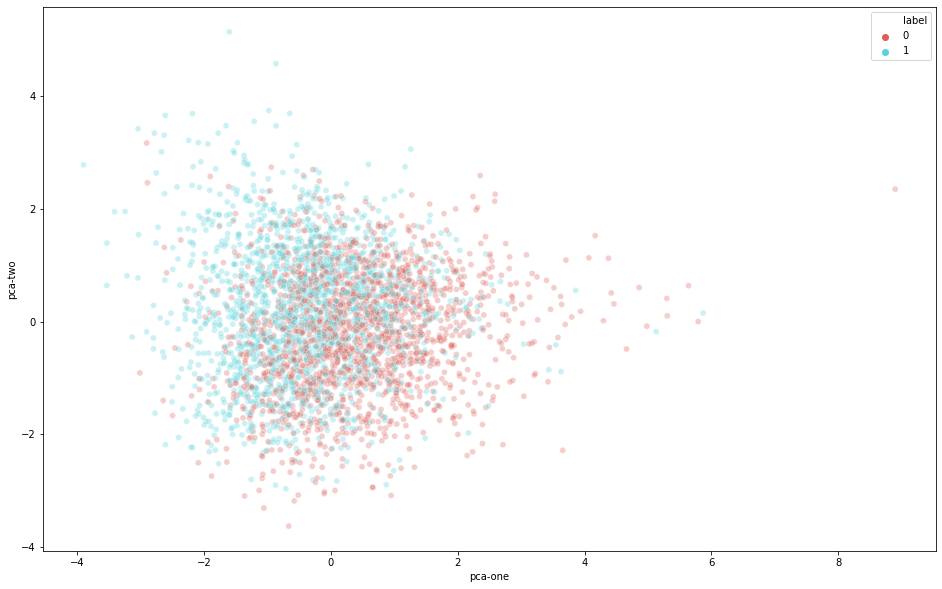

In [30]:
# 2d
plt.figure(figsize=(16,10))
sns.scatterplot(
    x="pca-one", y="pca-two",
    hue="label",
    palette=sns.color_palette("hls", df_subset.label.nunique()),
    data=df_subset.loc[rndperm,:],
    legend="full",
    alpha=0.3
)

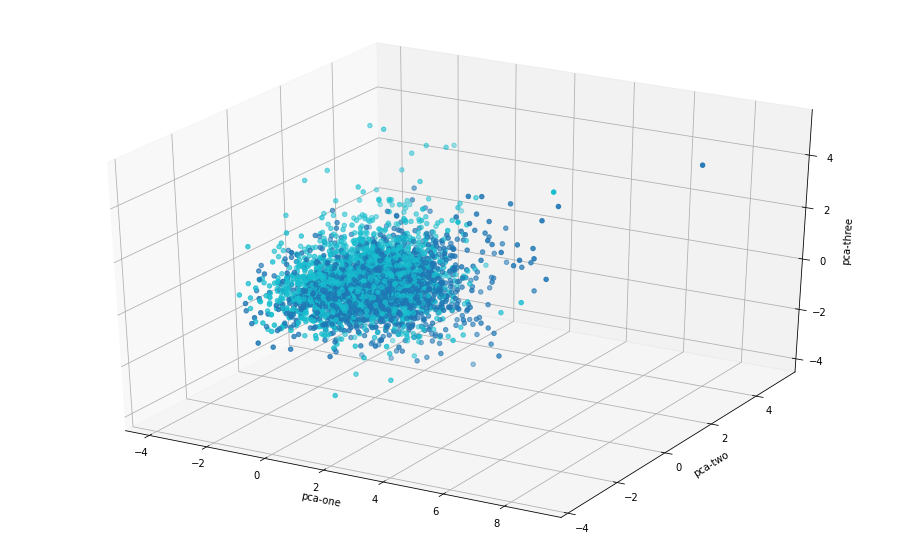

In [31]:
# 3d
ax = plt.figure(figsize=(16,10)).gca(projection='3d')
ax.scatter(
    xs=df_subset.loc[rndperm,:]["pca-one"], 
    ys=df_subset.loc[rndperm,:]["pca-two"], 
    zs=df_subset.loc[rndperm,:]["pca-three"], 
    c=df_subset.loc[rndperm,:]["label"], 
    cmap='tab10'
)
ax.set_xlabel('pca-one')
ax.set_ylabel('pca-two')
ax.set_zlabel('pca-three')
plt.show()

#### TSNE

In [32]:
np.random.seed(42)
time_start = time.time()
tsne = TSNE(n_components=2, verbose=1, perplexity=30, n_iter=300)
tsne_results = tsne.fit_transform(data_subset)

[t-SNE] Computing 91 nearest neighbors...
[t-SNE] Indexed 3554 samples in 0.052s...
[t-SNE] Computed neighbors for 3554 samples in 6.654s...
[t-SNE] Computed conditional probabilities for sample 1000 / 3554
[t-SNE] Computed conditional probabilities for sample 2000 / 3554
[t-SNE] Computed conditional probabilities for sample 3000 / 3554
[t-SNE] Computed conditional probabilities for sample 3554 / 3554
[t-SNE] Mean sigma: 1.306917
[t-SNE] KL divergence after 250 iterations with early exaggeration: 99.391342
[t-SNE] KL divergence after 300 iterations: 3.606865


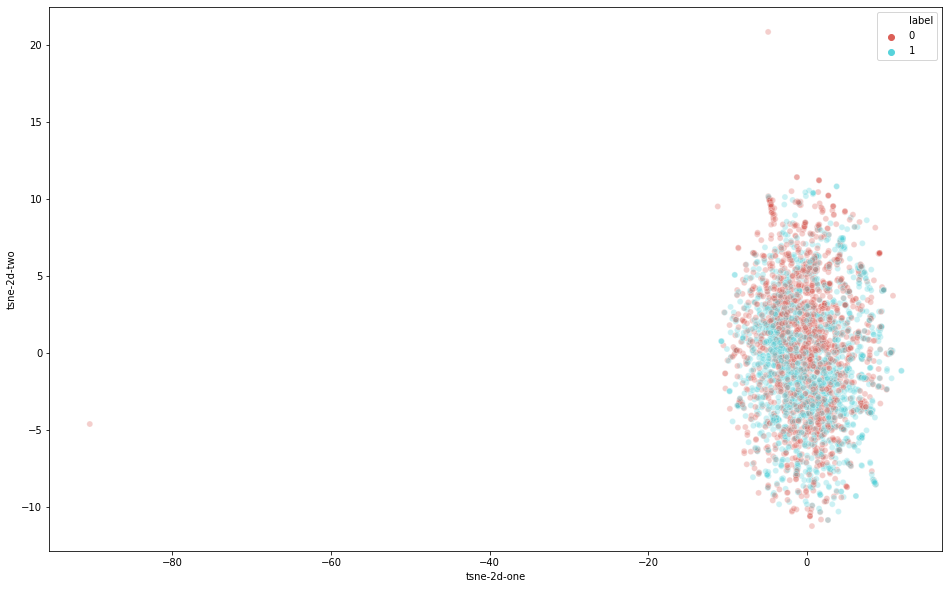

In [33]:
df_subset['tsne-2d-one'] = tsne_results[:,0]
df_subset['tsne-2d-two'] = tsne_results[:,1]
df_subset2 = df_subset # [df_subset['tsne-2d-two'] < 15]

plt.figure(figsize=(16,10))
sns.scatterplot(
    x="tsne-2d-one", y="tsne-2d-two",
    hue="label",
    palette=sns.color_palette("hls", df_subset2.label.nunique()),
    data=df_subset2,
    legend="full",
    alpha=0.3
)

#### Combined

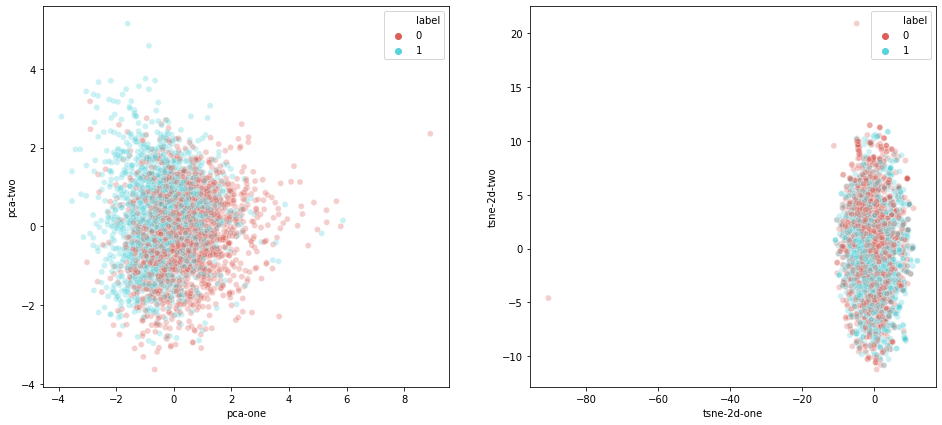

In [34]:
n_class = df_subset2.label.nunique()
plt.figure(figsize=(16,7))
ax1 = plt.subplot(1, 2, 1)
sns.scatterplot(
    x="pca-one", y="pca-two",
    hue="label",
    palette=sns.color_palette("hls", n_class),
    data=df_subset2,
    legend="full",
    alpha=0.3,
    ax=ax1
)
ax2 = plt.subplot(1, 2, 2)
sns.scatterplot(
    x="tsne-2d-one", y="tsne-2d-two",
    hue="label",
    palette=sns.color_palette("hls", n_class),
    data=df_subset2,
    legend="full",
    alpha=0.3,
    ax=ax2
)

In [39]:
dataset = 'mr'
model = 'transformer'
attn_obj = torch.load('./doc_embeddings/{}_{}_attn_obj.pt'.format(dataset, model))
texts = attn_obj['texts']
labels = np.array(attn_obj['labels'])
seq_lens = attn_obj['seq_lens']
ids = np.array(attn_obj['doc_test_ids'])
preds = np.array(attn_obj['preds'])
attns = attn_obj['attns']['attn_weight']
tfmr_attn_layer0 = attn_obj['attns']['tfmr_layer_0']
tfmr_attn_layer1 = attn_obj['attns']['tfmr_layer_1']

In [40]:
def plot_attention_weights(i, texts, labels, seq_lens, attns, max_tokens=80):
    seq_len = seq_lens[i]
    raw_sent = texts[i]
    sent = ' '.join(raw_sent.split()[:seq_len])
    attn = np.array(attns[i][:seq_len])
    label = labels[i]
    df = pd.DataFrame({'text': sent.split(), 'attn': attn}).iloc[:max_tokens]
    fig = plt.figure(figsize=(16,1))
    sns.heatmap(df['attn'].values.reshape(1,-1), 
                xticklabels=df['text'].values,
                yticklabels=['attn'],
                cmap='coolwarm')
    plt.title("label: {}".format(label))

In [41]:
ids[preds == labels][:10]

array(['doc_test_id_3', 'doc_test_id_4', 'doc_test_id_5', 'doc_test_id_6',
       'doc_test_id_7', 'doc_test_id_9', 'doc_test_id_12',
       'doc_test_id_13', 'doc_test_id_14', 'doc_test_id_16'], dtype='<U16')

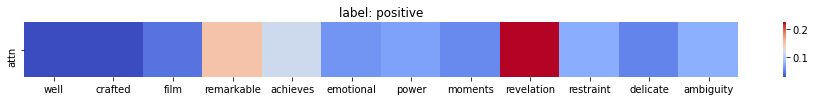

In [42]:
plot_attention_weights(3, texts, labels, seq_lens, attns, max_tokens=80)

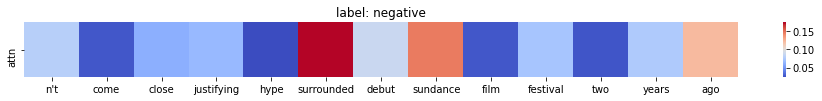

In [43]:
plot_attention_weights(4, texts, labels, seq_lens, attns, max_tokens=80)

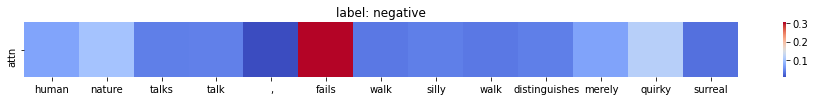

In [44]:
plot_attention_weights(16, texts, labels, seq_lens, attns, max_tokens=80)

Text(0.5, 1.0, 'label: positive')

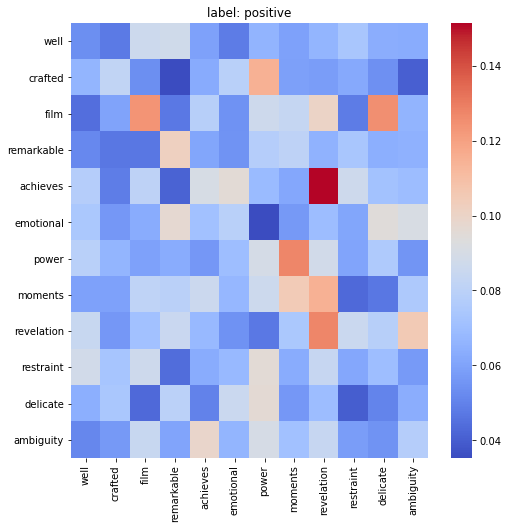

In [49]:
i=3
fig = plt.figure(figsize = (8,8))
seq_len = seq_lens[i]
tokens = texts[i].split()[:seq_len]
sns.heatmap(tfmr_attn_layer1[i].numpy()[:seq_len, :seq_len], 
            xticklabels=tokens,
            yticklabels=tokens,
            cmap='coolwarm')
plt.title('label: {}'.format(labels[i]))

#### Positive Example

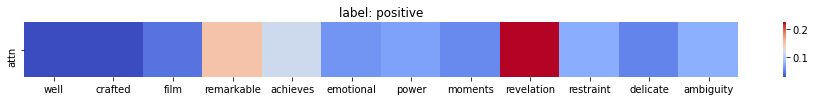

In [78]:
i=3
plot_attention_weights(i, texts, labels, seq_lens, attns, max_tokens=80)

'well crafted film remarkable achieves emotional power moments revelation restraint delicate ambiguity <pad> <pad> <pad>'

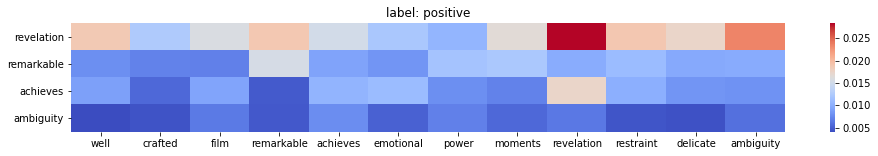

In [79]:
topk = 4
max_tokens=80
max_saliency_idx = np.array(attns[i]).argsort()[-topk:][::-1]
seq_len = seq_lens[i]
tokens = np.array(texts[i].split()[:seq_len])
fig = plt.figure(figsize = (16,2))
matrix = tfmr_attn_layer1[i].numpy()[max_saliency_idx].reshape(topk,-1)
weights = np.array(attns[i])[max_saliency_idx]
matrix = matrix * weights.reshape(-1,1) # weigh self attention with attention weights
sns.heatmap(matrix[:, :min(seq_len, max_tokens)], 
            xticklabels=tokens[:max_tokens],
            yticklabels=tokens[max_saliency_idx],
            cmap='coolwarm')
plt.title('label: {}'.format(labels[i]))
texts[i]

#### Negative Example

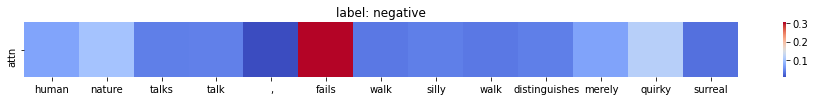

In [55]:
i=16
plot_attention_weights(i, texts, labels, seq_lens, attns, max_tokens=80)

'human nature talks talk , fails walk silly walk distinguishes merely quirky surreal <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad>'

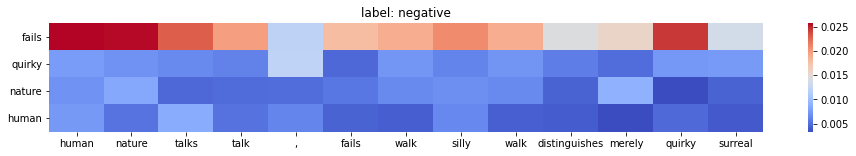

In [77]:
topk = 4
max_tokens=80
max_saliency_idx = np.array(attns[i]).argsort()[-topk:][::-1]
seq_len = seq_lens[i]
tokens = np.array(texts[i].split()[:seq_len])
fig = plt.figure(figsize = (16,2))
matrix = tfmr_attn_layer1[i].numpy()[max_saliency_idx].reshape(topk,-1)
weights = np.array(attns[i])[max_saliency_idx]
matrix = matrix * weights.reshape(-1,1) # weigh self attention with attention weights
sns.heatmap(matrix[:, :min(seq_len, max_tokens)], 
            xticklabels=tokens[:max_tokens],
            yticklabels=tokens[max_saliency_idx],
            cmap='coolwarm')
plt.title('label: {}'.format(labels[i]))
texts[i]